In [13]:
import pandas as pd
import gmaps
import numpy as np
import requests
import time
from us import states
import gmaps.datasets
from config import gkey
import matplotlib.pyplot as plt

In [2]:
farm_markets = pd.read_csv("Farmers Markets.csv")
regions= pd.read_csv ("Regions.csv")

farm_markets.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [3]:
farm_markets.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 10:43:57 PM
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 5:15:01 PM
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,N,N,N,N,N,N,N,N,N,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38:22 AM


In [4]:
farm_markets_clean = farm_markets.drop(["FMID", "Website", "Facebook", "Twitter", "Youtube",
                                       "OtherMedia", "street", "updateTime"], axis=1)
farm_markets_clean.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,05828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,N,Y,Y,Y,N,N,Y,Y,N,N
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,NaN,06/24/2017 to 09/30/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
2,106 S. Main Street Farmers Market,Six Mile,NaN,South Carolina,29682,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,64759,04/02/2014 to 11/30/2014,Wed: 3:00 PM-6:00 PM;Sat: 8:00 AM-1:00 PM;,NaN,NaN,NaN,...,N,N,N,Y,N,N,N,N,N,N
4,112st Madison Avenue,New York,New York,New York,10029,July to November,Tue:8:00 am - 5:00 pm;Sat:8:00 am - 8:00 pm;,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,N


In [5]:
df_market= pd.DataFrame(farm_markets_clean)




In [76]:
 #df_market["State"].unique()


In [12]:
#regions.head()


In [6]:
#A.merge(B, left_on='lkey', right_on='rkey', how='outer')
merge_df= df_market.merge(regions, left_on = 'State', right_on = 'State', how = 'outer' )
merge_df.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,Region
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,05828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,Y,Y,Y,N,N,Y,Y,N,N,Northeast
1,Barre Farmers Market,Barre,Washington,Vermont,05641,05/31/2017 to 10/04/2017,Wed: 4:00 PM-7:30 PM;,NaN,NaN,NaN,...,N,N,Y,N,N,N,N,N,N,Northeast
2,Bethel Farmers Market,Bethel,Windsor,Vermont,05089,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,Northeast
3,Bradford Farmers Market,Bradford,Orange,Vermont,0033,05/18/2014 to 10/19/2014,Sun: 10:00 AM-2:00 PM;,NaN,NaN,NaN,...,Y,N,Y,N,N,N,N,N,N,Northeast
4,Brandon Farmers Market,Brandon,Rutland,Vermont,05733,05/22/2015 to 10/09/2015,Fri: 9:00 AM-2:00 PM;,NaN,NaN,NaN,...,N,N,Y,N,N,N,N,N,N,Northeast


In [7]:
merge_df=merge_df.dropna(subset= ['x','y'])
merge_df.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,Region
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,05828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,Y,Y,Y,N,N,Y,Y,N,N,Northeast
1,Barre Farmers Market,Barre,Washington,Vermont,05641,05/31/2017 to 10/04/2017,Wed: 4:00 PM-7:30 PM;,NaN,NaN,NaN,...,N,N,Y,N,N,N,N,N,N,Northeast
2,Bethel Farmers Market,Bethel,Windsor,Vermont,05089,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,Northeast
3,Bradford Farmers Market,Bradford,Orange,Vermont,0033,05/18/2014 to 10/19/2014,Sun: 10:00 AM-2:00 PM;,NaN,NaN,NaN,...,Y,N,Y,N,N,N,N,N,N,Northeast
4,Brandon Farmers Market,Brandon,Rutland,Vermont,05733,05/22/2015 to 10/09/2015,Fri: 9:00 AM-2:00 PM;,NaN,NaN,NaN,...,N,N,Y,N,N,N,N,N,N,Northeast


In [15]:
#merge_df.to_csv('example.csv')

In [78]:
#merge_df.isnull().sum()

In [17]:
gmaps.configure(api_key= gkey)

In [18]:
locations = merge_df[["y","x"]].astype(float)

In [19]:

fig = gmaps.figure(map_type='HYBRID')
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)


heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:


#fig = gmaps.figure()
#markers = gmaps.marker_layer(locations)
#fig.add_layer(markers)
#fig

In [ ]:

#new_york_coordinates = (40.75, -74.00)
#fig = gmaps.figure(center=new_york_coordinates, zoom_level=12)
#markers = gmaps.marker_layer(locations)
#fig.add_layer(markers)
#fig

In [41]:
df_new = merge_df.groupby(['Region']).count()

df_new


,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
Region,,,,,,,,,,,,,,,,,,,,,
Central,1479,1479,1394,1479,1381,952,999,71,70,9,...,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479
East North Central,1072,1072,1034,1072,975,678,691,63,60,11,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072
Northeast,2128,2119,2023,2128,1851,1404,1438,89,89,10,...,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
Northwest,401,401,378,401,374,290,294,19,19,5,...,401,401,401,401,401,401,401,401,401,401
South,687,686,641,687,648,402,419,39,38,6,...,687,687,687,687,687,687,687,687,687,687
Southeast,1264,1264,1181,1264,1196,819,853,107,102,27,...,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264
Southwest,369,369,327,369,272,255,257,38,38,8,...,369,369,369,369,369,369,369,369,369,369
Unique,181,181,165,181,157,109,114,0,0,0,...,181,181,181,181,181,181,181,181,181,181
West,794,791,762,794,649,475,481,20,19,4,...,794,794,794,794,794,794,794,794,794,794


In [42]:
#x_axis = df_new.index
#y_axis = df_new['MarketName'].count()
#plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
#x_axis
df_new = df_new.reset_index()
df_new

,Region,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,...,Wine,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested
0,Central,1479,1479,1394,1479,1381,952,999,71,70,...,1479,1479,1479,1479,1479,1479,1479,1479,1479,1479
1,East North Central,1072,1072,1034,1072,975,678,691,63,60,...,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072
2,Northeast,2128,2119,2023,2128,1851,1404,1438,89,89,...,2128,2128,2128,2128,2128,2128,2128,2128,2128,2128
3,Northwest,401,401,378,401,374,290,294,19,19,...,401,401,401,401,401,401,401,401,401,401
4,South,687,686,641,687,648,402,419,39,38,...,687,687,687,687,687,687,687,687,687,687
5,Southeast,1264,1264,1181,1264,1196,819,853,107,102,...,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264
6,Southwest,369,369,327,369,272,255,257,38,38,...,369,369,369,369,369,369,369,369,369,369
7,Unique,181,181,165,181,157,109,114,0,0,...,181,181,181,181,181,181,181,181,181,181
8,West,794,791,762,794,649,475,481,20,19,...,794,794,794,794,794,794,794,794,794,794
9,West North Central,329,329,313,329,291,185,188,7,7,...,329,329,329,329,329,329,329,329,329,329


Text(0,0.5,'Number of Markets')

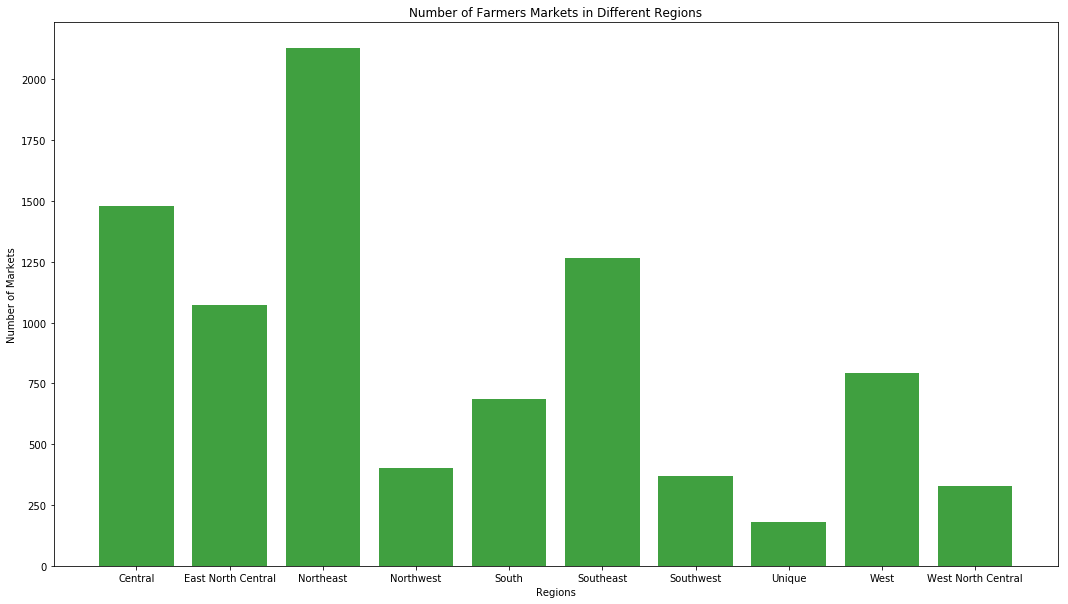

In [72]:
x_axis = df_new['Region']
y_axis = df_new['MarketName']
plt.figure(figsize=(18,10))
plt.bar(x_axis, y_axis, color='g', alpha=0.75, align="center")
plt.title ("Number of Farmers Markets in Different Regions")
plt.xlabel("Regions")
plt.ylabel("Number of Markets")



Text(0,0.5,'Number of Organic Markets')

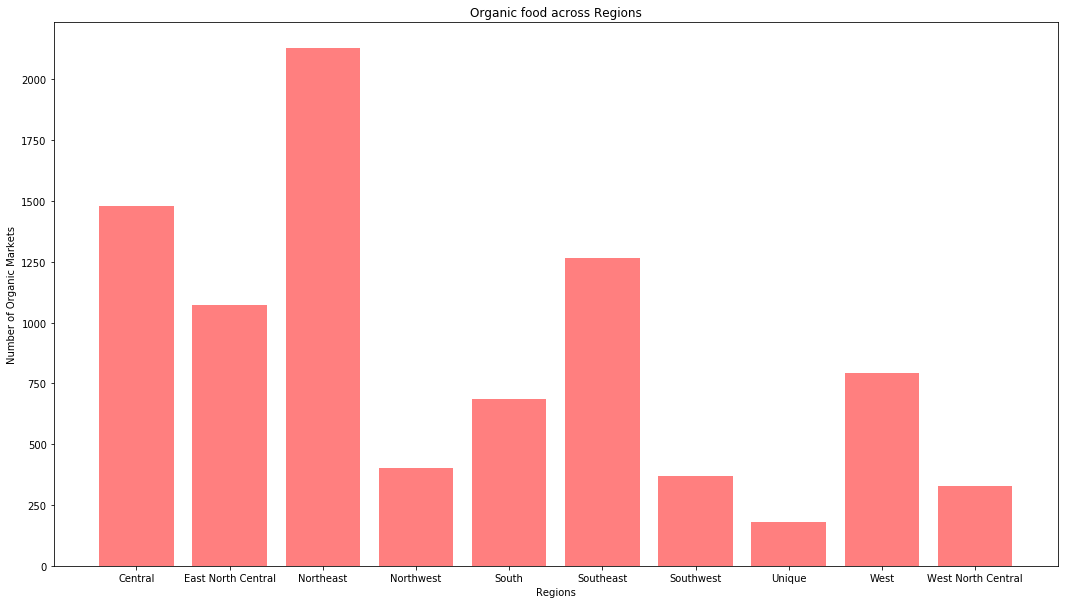

In [74]:
y_axis = df_new ["Organic"]
plt.figure(figsize=(18,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.50, align="center")
plt.title ("Organic food across Regions")
plt.xlabel("Regions")
plt.ylabel("Number of Organic Markets")


In [68]:
organized_df = merge_df[["MarketName","Credit","WIC","WICcash","SFMNP","SNAP"]]
organized_df.head()

,MarketName,Credit,WIC,WICcash,SFMNP,SNAP
0,Caledonia Farmers Market Association - Danville,Y,Y,N,Y,N
1,Barre Farmers Market,Y,N,N,N,Y
2,Bethel Farmers Market,N,N,N,N,N
3,Bradford Farmers Market,N,Y,Y,Y,N
4,Brandon Farmers Market,Y,Y,N,Y,N


In [112]:
new=organized_df.replace('N','0')
new.head()




,MarketName,Credit,WIC,WICcash,SFMNP,SNAP
0,Caledonia Farmers Market Association - Danville,Y,Y,0,Y,0
1,Barre Farmers Market,Y,0,0,0,Y
2,Bethel Farmers Market,0,0,0,0,0
3,Bradford Farmers Market,0,Y,Y,Y,0
4,Brandon Farmers Market,Y,Y,0,Y,0


In [109]:
new= new.dropna(subset = ['Credit'])
new.head()

,MarketName,Credit,WIC,WICcash,SFMNP,SNAP
0,Caledonia Farmers Market Association - Danville,Y,Y,NaN,Y,NaN
1,Barre Farmers Market,Y,NaN,NaN,NaN,Y
2,Bethel Farmers Market,NaN,NaN,NaN,NaN,NaN
3,Bradford Farmers Market,NaN,Y,Y,Y,NaN
4,Brandon Farmers Market,Y,Y,NaN,Y,NaN


<BarContainer object of 10 artists>

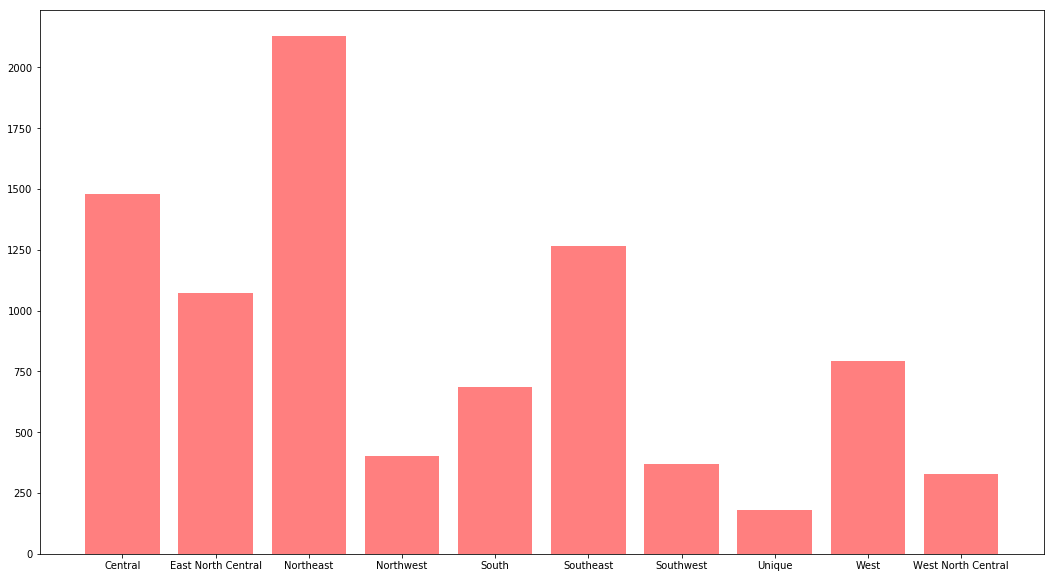

In [97]:
y_axis = df_new ["Credit"]
plt.figure(figsize=(18,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.50, align="center")